## All Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import os

import geopandas as gpd
import contextily as cx ##to apply a base map for Durham
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20

import cenpy

/Users/siddharthjain/anaconda/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## -------------------------------------------------------------------------------------------------------- ##

## Permit Data Cleaning

In [2]:
def drop_na_col(df):
    col_val = (pd.isnull(df).sum() == len(df)).tolist()
    col_val = [not x for x in col_val]
    return col_val

def clean_data1(path,engine):
    df = pd.read_excel(path,engine=engine,skiprows=3)
    df = df.dropna(how='all')
    df = df[df.columns[drop_na_col(df)]]
    df1 = df[1::2].reset_index(drop=True)
    df2 = df[2::2].reset_index(drop=True)
    col_names = df.iloc[0,:].reset_index()
    new_df = df1.join(df2,how='left',lsuffix=' ',rsuffix=' ')
    new_df = new_df.T.reset_index(drop=True).T
    new_df = new_df[new_df.columns[drop_na_col(new_df)]]
    new_df.columns = ['date','address','owner','contractor','cost','permit_number','occupancy','tax_map_including_parcel','C.T.']
    new_df['date'] = pd.to_datetime(new_df['date'])
    new_df['month'] = pd.to_datetime(new_df['date']).map(lambda x: x.month if pd.notnull(x.month) else 0.0).astype(int)
    new_df['year'] = pd.to_datetime(new_df['date']).map(lambda x: x.year if pd.notnull(x.year) else 0.0).astype(int)
    new_df['year_month'] = new_df['year'].astype(str)+'-'+new_df['month'].astype(str)
    new_df.drop('date',axis='columns',inplace=True)
    new_df['address'] = new_df['address'].replace(r'\s+',  ' ', regex=True)
    new_df['occupancy'] = new_df['occupancy'].replace(r'\s+',  ' ', regex=True)
    new_df = new_df.reindex(columns=['year_month','year','month','permit_number','address','owner','contractor','cost','occupancy','tax_map_including_parcel','C.T.'])
    
    return new_df

def clean_data2(path,engine):
    df = pd.read_excel(path,engine=engine,skiprows=4)
    df = df.dropna(how='all')
    df = df[df.columns[drop_na_col(df)]]
    df1 = df[1::2].reset_index(drop=True)
    df2 = df[2::2].reset_index(drop=True)
    col_names = df.iloc[0,:].reset_index()
    new_df = df1.join(df2,how='left',lsuffix=' ',rsuffix=' ')
    new_df = new_df.T.reset_index(drop=True).T
    new_df = new_df[new_df.columns[drop_na_col(new_df)]]
    new_df.columns = ['date','address','owner','contractor','cost','permit_number','occupancy','tax_map_including_parcel','C.T.']
    new_df['date'] = pd.to_datetime(new_df['date'])
    new_df['month'] = pd.to_datetime(new_df['date']).map(lambda x: x.month).astype(int)
    new_df['year'] = pd.to_datetime(new_df['date']).map(lambda x: x.year).astype(int)
    new_df['year_month'] = new_df['year'].astype(str)+'-'+new_df['month'].astype(str)
    new_df.drop('date',axis='columns',inplace=True)
    new_df['address'] = new_df['address'].replace(r'\s+',  ' ', regex=True)
    new_df['occupancy'] = new_df['occupancy'].replace(r'\s+',  ' ', regex=True)
    new_df = new_df.reindex(columns=['year_month','year','month','permit_number','address','owner','contractor','cost','occupancy','tax_map_including_parcel','C.T.'])
    
    return new_df

def clean_data3(path,engine):
    df = pd.read_excel(path,engine=engine,skiprows=3)
    df = df.dropna(how='all')
    df = df[df.columns[drop_na_col(df)]]
    df1 = df[1::2].reset_index(drop=True)
    df2 = df[2::2].reset_index(drop=True)
    col_names = df.iloc[0,:].reset_index()
    new_df = df1.join(df2,how='left',lsuffix=' ',rsuffix=' ')
    new_df = new_df.T.reset_index(drop=True).T
    new_df = new_df[new_df.columns[drop_na_col(new_df)]]
    new_df.insert(2,'owner','')
    new_df.columns = ['date','address','owner','contractor','cost','permit_number','occupancy','tax_map_including_parcel','C.T.']
    new_df['date'] = pd.to_datetime(new_df['date'])
    new_df['month'] = pd.to_datetime(new_df['date']).map(lambda x: x.month).astype(int)
    new_df['year'] = pd.to_datetime(new_df['date']).map(lambda x: x.year).astype(int)
    new_df['year_month'] = new_df['year'].astype(str)+'-'+new_df['month'].astype(str)
    new_df.drop('date',axis='columns',inplace=True)
    new_df['address'] = new_df['address'].replace(r'\s+',  ' ', regex=True)
    new_df['occupancy'] = new_df['occupancy'].replace(r'\s+',  ' ', regex=True)
    new_df = new_df.reindex(columns=['year_month','year','month','permit_number','address','owner','contractor','cost','occupancy','tax_map_including_parcel','C.T.'])
    
    return new_df

In [3]:
all_files = [f for f in os.listdir(os.getcwd()) if f[0:9]=='co_newres']
all_frames = []
for f in all_files:
    if f in ['co_newres1216.xls','co_newres1118.xls','co_newres0616.xls','co_newres0818.xls',\
             'co_newres0716.xls','co_newres1218.xls']:
        all_frames.append(clean_data2(f,'xlrd'))
    elif (f[11:13] in ['20','21']) and (f not in ['co_newres0720.xlsx','co_newres0120.xlsx','co_newres0220.xlsx','co_newres0221.xlsx']):
        if f[14:] == 'xls':
            all_frames.append(clean_data3(f,'xlrd'))
        elif f[14:] == 'xlsx':
            if f in ('co_newres0621.xlsx'):
                all_frames.append(clean_data3(f,'openpyxl'))
    elif f in ('co_newres0221.xlsx'):
        new_df = clean_data1(f,'openpyxl')
        new_df.drop(['year_month','cost'],axis='columns',inplace=True)
        new_df = new_df.dropna(how='all')
        new_df = new_df[(new_df.month > 0) & (new_df.year>0)]
        new_df['month'] = new_df.month.astype(int)
        new_df['year'] = new_df.year.astype(int)
        new_df['year_month'] = new_df['year'].astype(str)+'-'+new_df['month'].astype(str)
        new_df.columns = ['year','month','permit_number','address','contractor','cost','occupancy','tax_map_including_parcel','C.T.','year_month']
        new_df = new_df.reindex(columns=['year_month','year','month','permit_number','address','contractor','cost','occupancy','tax_map_including_parcel','C.T.'])
        new_df.insert(5,'owner','')
        all_frames.append(new_df)
    else:
        if f[14:] == 'xls':
            all_frames.append(clean_data1(f,'xlrd'))
        elif f[14:] == 'xlsx':
            all_frames.append(clean_data1(f,'openpyxl'))

final_data = pd.concat(all_frames)
final_data.reset_index(inplace=True)
final_data = final_data.drop('index',axis='columns')
final_data = final_data.drop_duplicates(subset=['address','permit_number','occupancy','C.T.'])
final_data['address'] = final_data['address'].replace(r'TRL','TRAIL',regex=True)

## Save csv without geolocation data

In [4]:
final_data.to_csv("2014_2021_permit_data.csv")

## Completed Geolocation Code##

In [5]:
%matplotlib inline

In [6]:
parcel_map = gpd.read_file('Parcels/Parcels.shp')
parcel_data = parcel_map[['PARCEL_ID','PIN','SUM_ACRE','SITE_ADDRE','LAND_USE','LAND_VALUE','BLDG_VALUE','TOTAL_VALU','DATE_SOLD','SALE_PRICE','geometry']]
parcel_data.columns=['parcel_id','pin','acreage','address','land_use_id','land_value','home_value','total_value','date_sold','sale_price','geometry']
parcel_data['address'] = parcel_data['address'].replace(r'\s+',  ' ', regex=True)
parcel_data['address'] = parcel_data['address'].replace(r'TRL',  'TRAIL', regex=True)
new_df = parcel_data.merge(final_data,how='right',on='address',indicator=True)
new_df = new_df[(new_df['_merge']=='both')]
new_df['date_sold'] = new_df.date_sold.astype(int)
new_df = new_df[new_df.date_sold!=0]

# acs = cenpy.products.ACS(2019)
# db = acs.from_place(place="Durham County, NC",level="tract")




/Users/siddharthjain/anaconda/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


## Save the permit data as csv

In [7]:
new_df.to_csv("2014_2021_permit_data_geo.csv")

In [8]:
# Post in stackoverflow - this is not working
# acs = cenpy.products.ACS(2019)
# db = acs.from_place(place="Durham County, NC",place_type="County Subdivision",level="county")

In [9]:
plt.rcParams["figure.figsize"]=20,20

## Plotting Durham City and Permit Data

In [10]:
# f, ax = plt.subplots()
# db.to_crs(new_df.crs).plot(ax=ax,alpha = 0.4,edgecolor='k')
# new_df.plot(ax=ax,color='red')

In [11]:
## Plotting Parcel Data and Permit Data

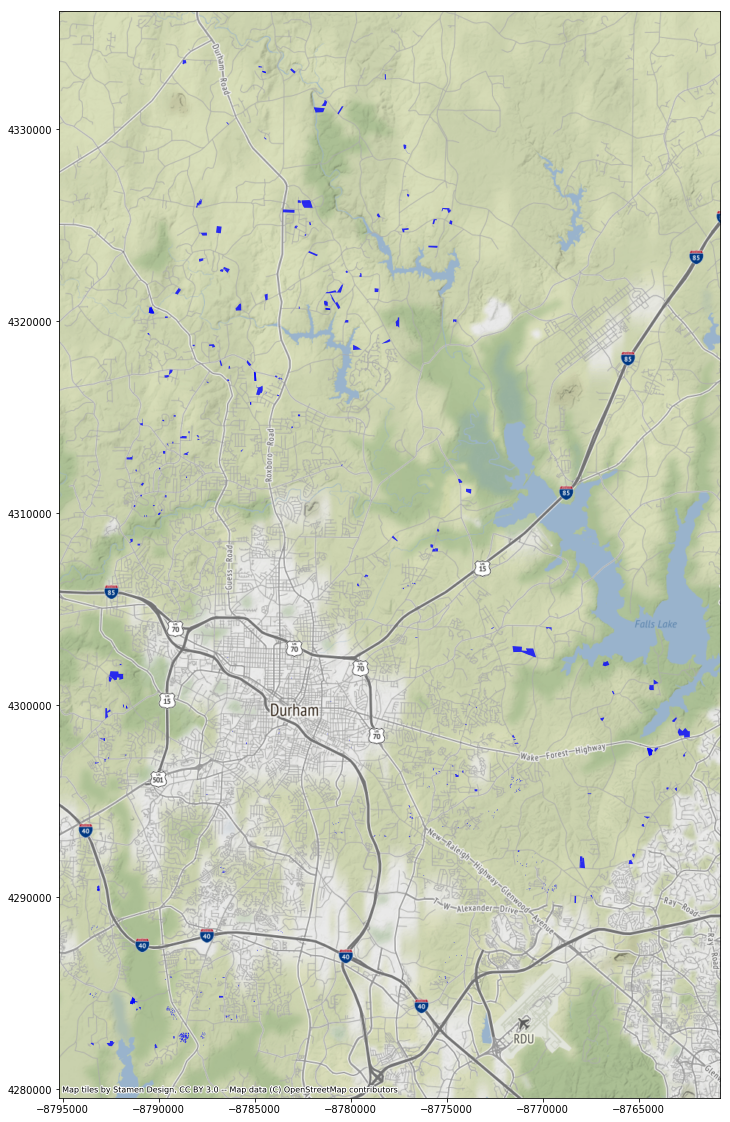

In [12]:
plt.rcParams["figure.figsize"]=20,20
ax2 = new_df.to_crs(epsg=3857).plot(color='blue',alpha=0.8)
cx.add_basemap(ax2)

In [13]:
## Post on stackover flow about different shading
# ax3 = parcel_data['geometry'].to_crs(epsg=3857).plot(alpha=0.1,color='red',edgecolor='k')
# cx.add_basemap(ax3)